In [17]:
# importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the datset
df = pd.read_csv("heart.csv")

In [18]:
#Basic information of the dataset
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [19]:
df.shape

(918, 12)

In [20]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [21]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [22]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


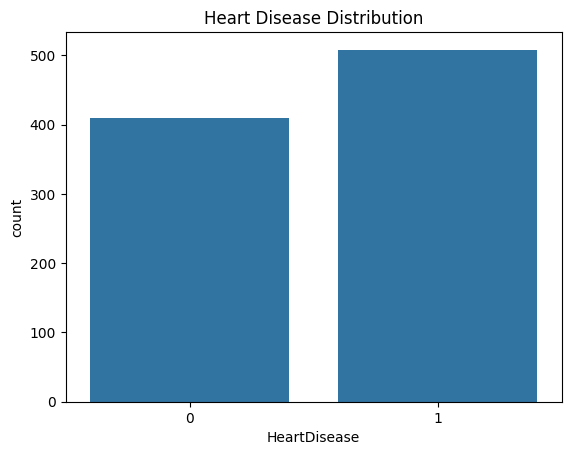

In [23]:
#2. Exploratory Data Analysis (EDA)
sns.countplot(data=df, x="HeartDisease")
plt.title("Heart Disease Distribution")
plt.show()

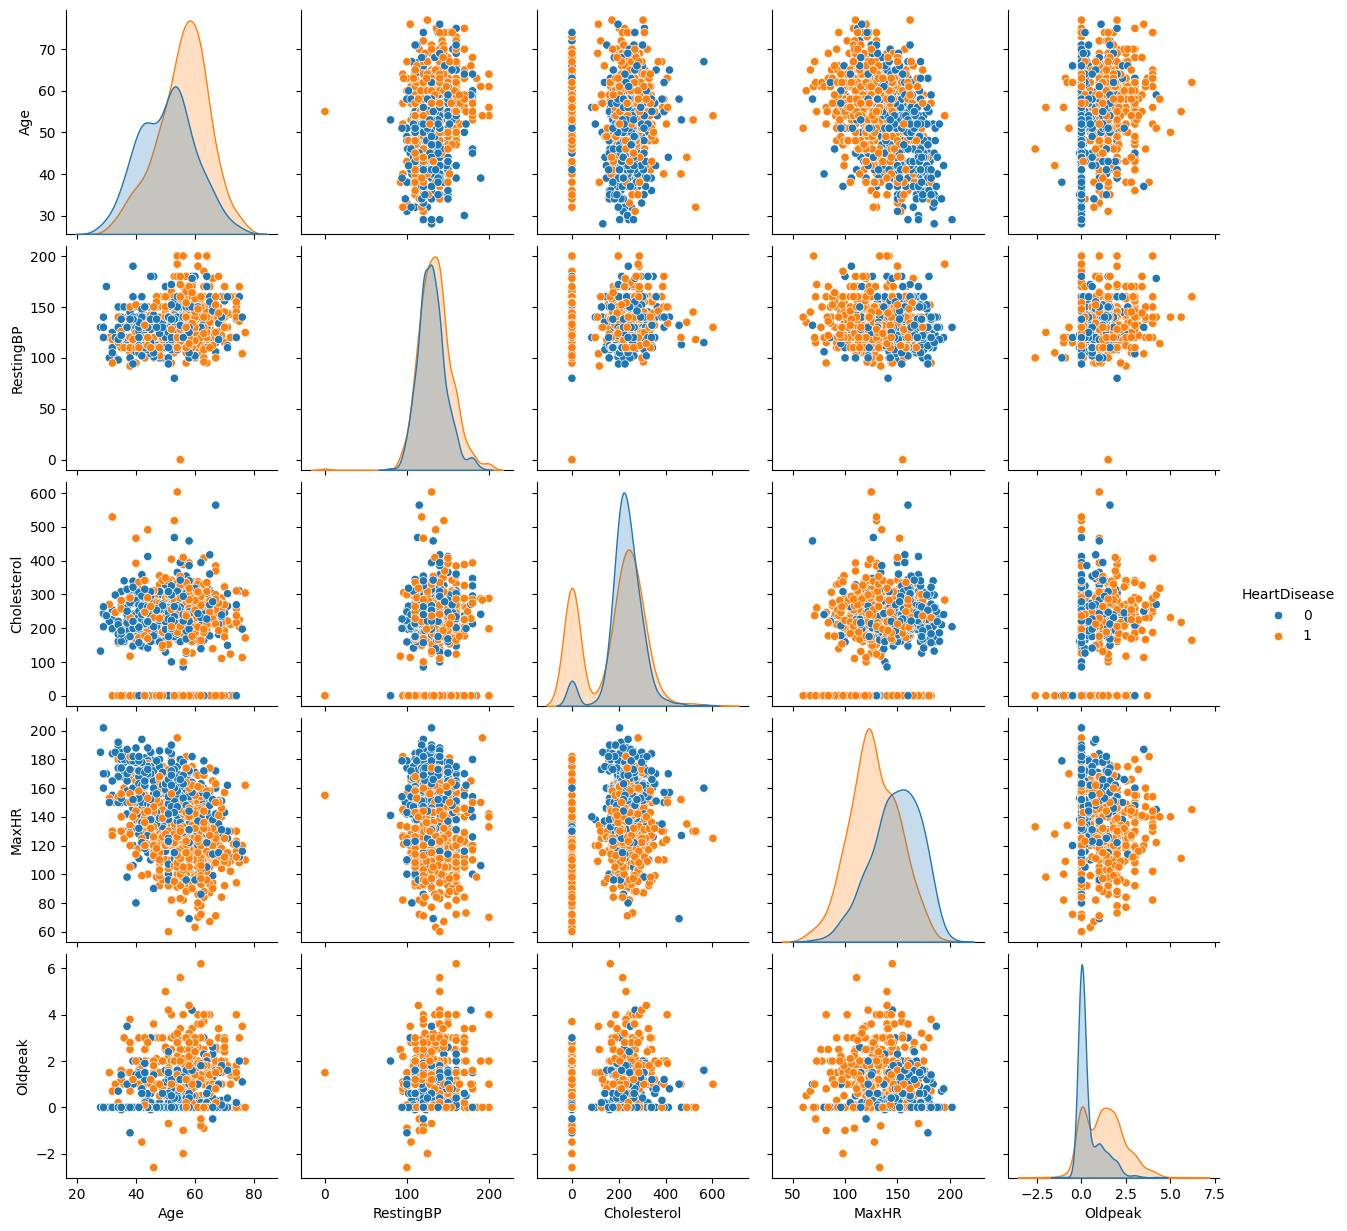

In [24]:
# Pairplot for a few features vs HeartDisease
sns.pairplot(df, hue='HeartDisease', vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
plt.show()

In [25]:
# Getting all categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [26]:
# Showing each categorical column and its unique categories
for col in categorical_cols:
    print(f"\nColumn: {col}")
print("Unique categories:", df[col].unique())


Column: Sex

Column: ChestPainType

Column: RestingECG

Column: ExerciseAngina

Column: ST_Slope
Unique categories: ['Up' 'Flat' 'Down']


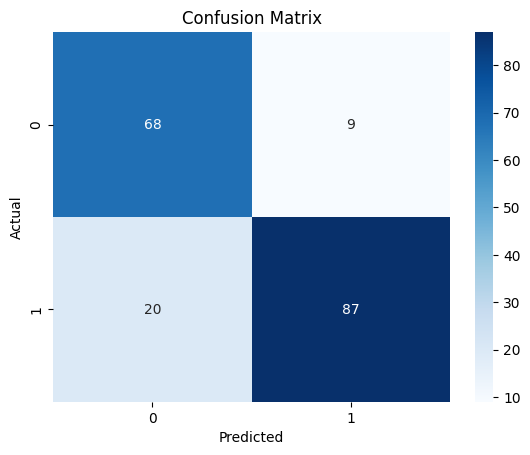

In [31]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
# Features(x) and target(y)
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
from sklearn.model_selection import train_test_split
# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Model Building (Logistic Regression)
from sklearn.linear_model import LogisticRegression
# Initializing and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predicting on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
#Model Evaluation 
#A. Confusion Matrix and Classification Report
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_score,
    recall_score, f1_score
)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



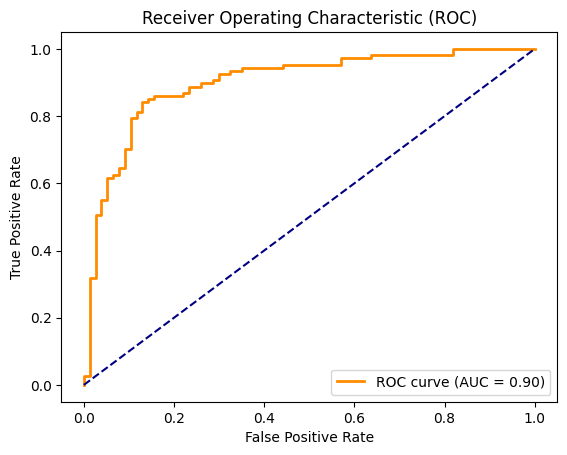

In [33]:
#B. ROC Curve
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [35]:
#C. Precision, Recall, F1 Score
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision Score: 0.90625
Recall Score: 0.8130841121495327
F1 Score: 0.8571428571428571
